In [23]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(x,0)

def elu(x,alpha=0.01):
    return np.maximum(x,alpha*(np.exp(x)-1))

def prelu(x,alpha=0.01):
    return np.maximum(x,alpha*x)

def leaky_relu(x,alpha=0.01):
    return np.maximum(x,alpha*x)

def selu(x,lamda=0.01):
    return lamda*elu(x)

def softsign(x):
    return (x)/(1+np.abs(x))

def softplus(x):
    return np.log10(1+np.exp(x))

def hard_sigmoid(x):
    result = np.zeros_like(x)
    result[x >= 2.5] = 1
    result[(x > -2.5) & (x < 2.5)] = 0.2 * x[(x > -2.5) & (x < 2.5)] + 0.5
    return result
    
def swish(x):
    return x*sigmoid(x)

def mish(x):
    return x* tanh(np.log(1+np.exp(x)))

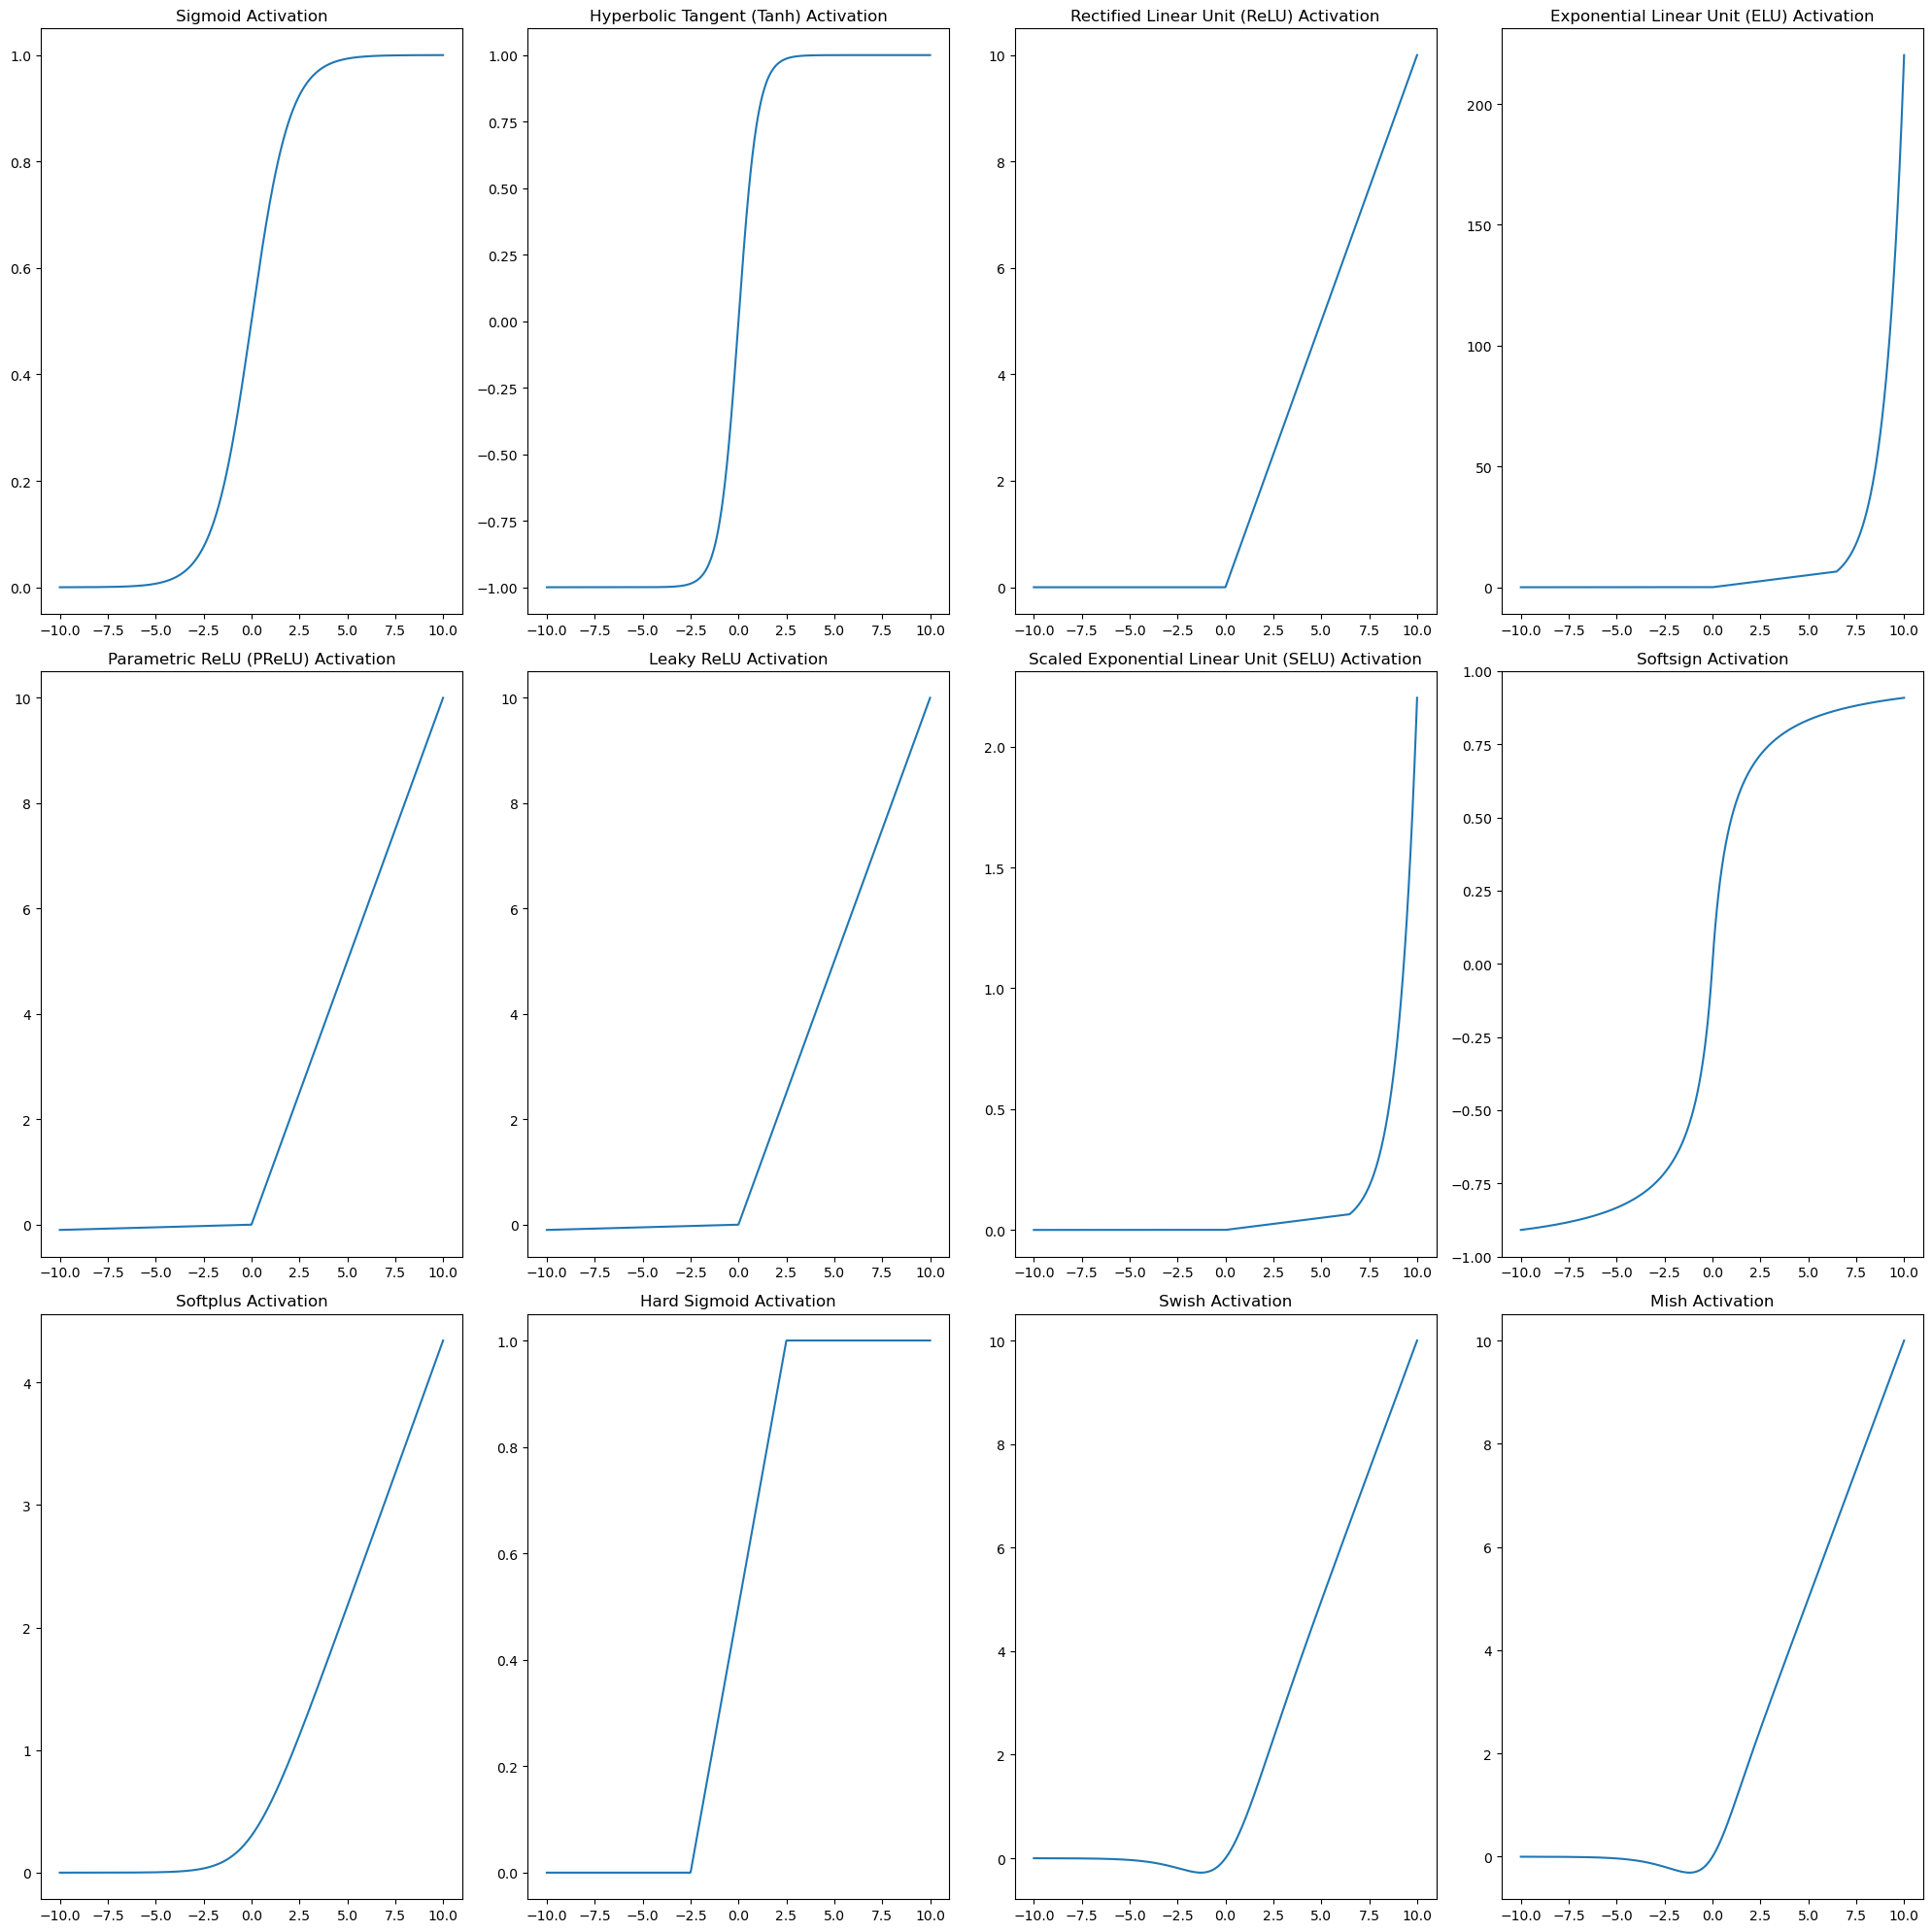

In [28]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10,1000)
plt.figure(figsize=(20, 20))

plt.subplot(3, 4, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation')

plt.subplot(3, 4, 2)
plt.plot(x, tanh(x))
plt.title('Hyperbolic Tangent (Tanh) Activation')

plt.subplot(3, 4, 3)
plt.plot(x, relu(x))
plt.title('Rectified Linear Unit (ReLU) Activation')

plt.subplot(3, 4, 4)
plt.plot(x, elu(x))
plt.title('Exponential Linear Unit (ELU) Activation')

plt.subplot(3, 4, 5)
plt.plot(x, prelu(x))
plt.title('Parametric ReLU (PReLU) Activation')

plt.subplot(3, 4, 6)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Activation')

plt.subplot(3, 4, 7)
plt.plot(x, selu(x))
plt.title('Scaled Exponential Linear Unit (SELU) Activation')

plt.subplot(3, 4, 8)
plt.plot(x, softsign(x))
plt.title('Softsign Activation')

plt.subplot(3, 4, 9)
plt.plot(x, softplus(x))
plt.title('Softplus Activation')

plt.subplot(3, 4, 10)
plt.plot(x, hard_sigmoid(x))
plt.title('Hard Sigmoid Activation')

plt.subplot(3, 4, 11)
plt.plot(x, swish(x))
plt.title('Swish Activation')

plt.subplot(3, 4, 12)
plt.plot(x, mish(x))
plt.title('Mish Activation')

plt.tight_layout()
plt.show()

In [42]:
#LiSHT, which stands for Linearly Scaled Hyperbolic Tangent
def LiSHT(x):
    return x * np.tanh(x)
#Custom Activation Function
def AF_23120002(x_array, threshold=1, spike_threshold=0.8, spike_value=1, reset_value=0, decay=0.9):
    """
    A combination of a threshold, spiking behavior, and membrane potential activation function.

    Parameters:
    - x: Input value.
    - threshold: Threshold for activation.
    - spike_threshold: Threshold for spiking behavior.
    - spike_value: Value when spiking occurs.
    - reset_value: Value after spiking resets.
    - decay: Decay factor for the membrane potential.

    Returns:
    - Output value after applying the combined activation.
    """

    output_array = np.zeros_like(x_array)

    # Apply LiSHT to the input
    x_array = LiSHT(x_array)

    # Set elements that exceed the threshold to a constant value
    output_array[x_array >= threshold] = 1

    # Set elements between spike_threshold and threshold to spike_value
    spike_mask = np.logical_and(x_array >= spike_threshold, x_array < threshold)
    output_array[spike_mask] = spike_value

    # Update elements below spike_threshold using membrane potential with decay
    decay_mask = x_array < spike_threshold
    output_array[decay_mask] = np.maximum(0, x_array[decay_mask] - decay)

    return output_array


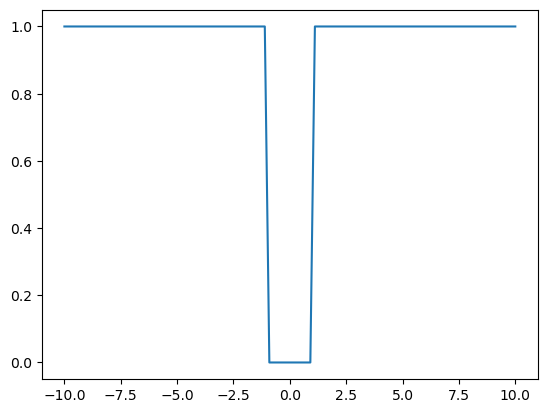

In [43]:
x = np.linspace(-10,10,100)
plt.plot(x,AF_23120002(x))

#### White box neural network

In [5]:
import numpy as np

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_parameters(input_size, hidden_layer_sizes, output_size):
    np.random.seed(42)
    layers_sizes = [input_size] + hidden_layer_sizes + [output_size]
    weights = []

    for i in range(1, len(layers_sizes)):
        weights.append(np.random.rand(layers_sizes[i - 1], layers_sizes[i]))

    return weights

def forward_propagation(X, weights):
    layer_outputs = [X]
    for i in range(len(weights)):
        layer_input = np.dot(layer_outputs[-1], weights[i])
        layer_output = sigmoid(layer_input)
        layer_outputs.append(layer_output)

    return layer_outputs

def backward_propagation(X, y, layer_outputs, weights):
    errors = [y - layer_outputs[-1]]
    deltas = [errors[-1] * sigmoid_derivative(layer_outputs[-1])]

    for i in range(len(weights) - 1, 0, -1):
        errors.insert(0, deltas[0].dot(weights[i].T))
        deltas.insert(0, errors[0] * sigmoid_derivative(layer_outputs[i]))

    return deltas

def update_weights(layer_outputs, deltas, weights, learning_rate):
    for i in range(len(weights)):
        weights[i] += layer_outputs[i].T.dot(deltas[i]) * learning_rate

    return weights

def train_neural_network(X, y, input_size, hidden_layer_sizes, output_size, epochs, learning_rate):
    weights = initialize_parameters(input_size, hidden_layer_sizes, output_size)

    for epoch in range(epochs):
        # Forward Propagation
        layer_outputs = forward_propagation(X, weights)

        # Backward Propagation
        deltas = backward_propagation(X, y, layer_outputs, weights)

        # Update Weights
        weights = update_weights(layer_outputs, deltas, weights, learning_rate)

        # Print the mean squared error every 100 epochs
        if epoch % 100 == 0:
            mse = np.mean(np.square(y - layer_outputs[-1]))
            print(f"Epoch {epoch}, Mean Squared Error: {mse}")

    return weights



X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = X.shape[1]
hidden_layer_sizes = [4, 3]  # Example: Two hidden layers with 4 and 3 neurons
output_size = 1
epochs = 1000
learning_rate = 0.1

trained_weights = train_neural_network(X, y, input_size, hidden_layer_sizes, output_size, epochs, learning_rate)


Epoch 0, Mean Squared Error: 0.2842876452934377
Epoch 100, Mean Squared Error: 0.24999118368636097
Epoch 200, Mean Squared Error: 0.24997863841178564
Epoch 300, Mean Squared Error: 0.2499765668517072
Epoch 400, Mean Squared Error: 0.24997447120437605
Epoch 500, Mean Squared Error: 0.24997234681660674
Epoch 600, Mean Squared Error: 0.24997019134954684
Epoch 700, Mean Squared Error: 0.2499680024119372
Epoch 800, Mean Squared Error: 0.24996577755544586
Epoch 900, Mean Squared Error: 0.24996351427030306


#### Grey Wolf Optimisation

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, weights):
    # Add bias to input layer
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Hidden layer
    hidden_input = np.dot(X_bias, weights['input_hidden'])
    hidden_output = sigmoid(hidden_input)
    
    # Output layer
    output_input = np.dot(np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output)), weights['hidden_output'])
    output = sigmoid(output_input)
    
    return output

def initialize_weights(input_size, hidden_size, output_size):
    weights = {
        'input_hidden': np.random.rand(input_size + 1, hidden_size),
        'hidden_output': np.random.rand(hidden_size + 1, output_size)
    }
    return weights

def decode_wolf_position(X, input_size, hidden_size, output_size):
    input_hidden_size = (input_size + 1) * hidden_size
    hidden_output_size = (hidden_size + 1) * output_size
    
    input_hidden_end = input_hidden_size
    hidden_output_end = input_hidden_size + hidden_output_size
    
    weights = {
        'input_hidden': X[:input_hidden_end].reshape((input_size + 1, hidden_size), order='F'),
        'hidden_output': X[input_hidden_end:hidden_output_end].reshape((hidden_size + 1, output_size), order='F')
    }
    
    return weights

def fitness(X, X_train, y_train, input_size, hidden_size, output_size):
    weights = decode_wolf_position(X, input_size, hidden_size, output_size)
    predicted_output = forward_propagation(X_train, weights)
    mse = np.mean(np.square(y_train - predicted_output))
    return mse


def gwo_optimizer(X_train, y_train, input_size, hidden_size, output_size, num_wolves, epochs):
    num_dimensions = (input_size + 1) * hidden_size + (hidden_size + 1) * output_size
    wolves_position = np.random.rand(num_wolves, num_dimensions)
    
    alpha, beta, delta = wolves_position[:3, :]
    fitness_beta = float('inf')
    fitness_delta = float('inf')
    
    for epoch in range(epochs):
        a = 2 - 2 * epoch / epochs  # linearly decreased from 2 to 0
        
        for i in range(num_wolves):
            A = 2 * a * np.random.rand(num_dimensions) - a
            C = 2 * np.random.rand(num_dimensions)
            D_alpha = np.abs(C * alpha - wolves_position[i, :])
            D_beta = np.abs(C * beta - wolves_position[i, :])
            D_delta = np.abs(C * delta - wolves_position[i, :])
            
            X1 = alpha - A * D_alpha
            X2 = beta - A * D_beta
            X3 = delta - A * D_delta
            
            new_position = (X1 + X2 + X3) / 3.0
            
            # Clip the positions to the range [0, 1]
            new_position = np.clip(new_position, 0, 1)
            
            # Evaluate fitness
            fitness_i = fitness(new_position, X_train, y_train, input_size, hidden_size, output_size)
            fitness_alpha = fitness(alpha, X_train, y_train, input_size, hidden_size, output_size)
            
            # Update alpha, beta, and delta
            if fitness_i < fitness_alpha:
                alpha = new_position.copy()
                fitness_alpha = fitness_i
            elif fitness_i < fitness_beta:
                beta = new_position.copy()
                fitness_beta = fitness_i
            elif fitness_i < fitness_delta:
                delta = new_position.copy()
                fitness_delta = fitness_i
                
        print(f"Epoch {epoch + 1}, Best Fitness: {fitness_alpha}")

    return alpha

# Example usage:
# Assuming X_train and y_train are your training data and labels
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1]])
y_train = np.array([[0], [1], [1], [0], [0], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
num_wolves = 5
epochs = 100

best_wolf_position = gwo_optimizer(X_train, y_train, input_size, hidden_size, output_size, num_wolves, epochs)
best_weights = decode_wolf_position(best_wolf_position, input_size, hidden_size, output_size)



Epoch 1, Best Fitness: 0.4132223781070232
Epoch 2, Best Fitness: 0.33459166982862926
Epoch 3, Best Fitness: 0.2931737575955912
Epoch 4, Best Fitness: 0.2931737575955912
Epoch 5, Best Fitness: 0.2883936427714124
Epoch 6, Best Fitness: 0.2883936427714124
Epoch 7, Best Fitness: 0.2883936427714124
Epoch 8, Best Fitness: 0.2883936427714124
Epoch 9, Best Fitness: 0.263526162944839
Epoch 10, Best Fitness: 0.263526162944839
Epoch 11, Best Fitness: 0.263526162944839
Epoch 12, Best Fitness: 0.263526162944839
Epoch 13, Best Fitness: 0.2632409010208424
Epoch 14, Best Fitness: 0.2632409010208424
Epoch 15, Best Fitness: 0.2632409010208424
Epoch 16, Best Fitness: 0.2632409010208424
Epoch 17, Best Fitness: 0.2632409010208424
Epoch 18, Best Fitness: 0.2632409010208424
Epoch 19, Best Fitness: 0.25627349017257717
Epoch 20, Best Fitness: 0.25627349017257717
Epoch 21, Best Fitness: 0.25627349017257717
Epoch 22, Best Fitness: 0.25627349017257717
Epoch 23, Best Fitness: 0.25627349017257717
Epoch 24, Best Fit

In [8]:
def train_neural_network(X_train, y_train, input_size, hidden_size, output_size, epochs, learning_rate):
    # Initialize weights
    weights = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        # Forward propagation
        hidden_input = np.dot(np.hstack((np.ones((X_train.shape[0], 1)), X_train)), weights['input_hidden'])
        hidden_output = sigmoid(hidden_input)
        output_input = np.dot(np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output)), weights['hidden_output'])
        predicted_output = sigmoid(output_input)

        # Backpropagation
        output_error = y_train - predicted_output
        output_delta = output_error * predicted_output * (1 - predicted_output)
        hidden_error = np.dot(output_delta, weights['hidden_output'].T)
        
        # Ensure the hidden_size matches the number of neurons in the hidden layer
        hidden_delta = hidden_error[:, :-1] * hidden_output * (1 - hidden_output)

        # Update weights
        weights['hidden_output'] += learning_rate * np.dot(np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output)).T, output_delta)
        weights['input_hidden'] += learning_rate * np.dot(np.hstack((np.ones((X_train.shape[0], 1)), X_train)).T, hidden_delta)

        if epoch % 1000 == 0:
            mse = np.mean(np.square(y_train - predicted_output))
            print(f"Epoch {epoch}, MSE: {mse}")

    return weights

def forward_propagation(X, weights):
    # Add bias to input layer
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Hidden layer
    hidden_input = np.dot(X_bias, weights['input_hidden'])
    hidden_output = sigmoid(hidden_input)
    
    # Output layer
    output_input = np.dot(np.hstack((np.ones((hidden_output.shape[0], 1)), hidden_output)), weights['hidden_output'])
    output = sigmoid(output_input)
    
    return output

# Train the neural network using the GWO-obtained weights
trained_weights = train_neural_network(X_train, y_train, input_size, hidden_size, output_size, 10000, 0.1)

# Use the GWO-optimized weights for making predictions
predicted_output = forward_propagation(X_train, best_weights)

# Optionally, you can also use the trained weights obtained from backpropagation for comparison
predicted_output_trained = forward_propagation(X_train, trained_weights)

# Print the results
print("Predicted Output using GWO-optimized weights:")
print(predicted_output)

print("\nPredicted Output using trained weights:")
print(predicted_output_trained)

Epoch 0, MSE: 0.45820254550149064
Epoch 1000, MSE: 0.2381687034697985
Epoch 2000, MSE: 0.22053267721999842
Epoch 3000, MSE: 0.1485774442579811
Epoch 4000, MSE: 0.10497121935827715
Epoch 5000, MSE: 0.09962959895717212
Epoch 6000, MSE: 0.09787641875241786
Epoch 7000, MSE: 0.09708087595738177
Epoch 8000, MSE: 0.09663736606842324
Epoch 9000, MSE: 0.09635719750901361
Predicted Output using GWO-optimized weights:
[[0.50008102]
 [0.50010562]
 [0.50011071]
 [0.5001254 ]
 [0.5001254 ]
 [0.50010562]
 [0.50010562]]

Predicted Output using trained weights:
[[0.04095212]
 [0.66431465]
 [0.95149229]
 [0.0349416 ]
 [0.0349416 ]
 [0.66431465]
 [0.66431465]]


#### Genetic Algorithm

In [9]:
import numpy as np

# Define the neural network architecture
def initialize_weights(input_size, hidden_size, output_size):
    input_hidden_weights = np.random.rand(input_size, hidden_size)
    hidden_output_weights = np.random.rand(hidden_size, output_size)
    return input_hidden_weights, hidden_output_weights

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, input_hidden_weights, hidden_output_weights):
    hidden_layer_input = np.dot(X, input_hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights)
    predicted_output = sigmoid(output_layer_input)
    
    return predicted_output

# Genetic Algorithm Functions
def initialize_population(population_size, input_size, hidden_size, output_size):
    population = []
    for _ in range(population_size):
        input_hidden_weights, hidden_output_weights = initialize_weights(input_size, hidden_size, output_size)
        chromosome = {'input_hidden': input_hidden_weights, 'hidden_output': hidden_output_weights}
        population.append(chromosome)
    return population

def calculate_fitness(chromosome, X, y):
    input_hidden_weights = chromosome['input_hidden']
    hidden_output_weights = chromosome['hidden_output']
    
    predicted_output = forward_propagation(X, input_hidden_weights, hidden_output_weights)
    mse = np.mean(np.square(y - predicted_output))
    return 1 / (1 + mse)  # Maximizing fitness, so using the inverse of MSE

def crossover(parent1, parent2):
    child = {}
    for key in parent1:
        crossover_point = np.random.randint(0, parent1[key].shape[0])
        child[key] = np.vstack((parent1[key][:crossover_point, :], parent2[key][crossover_point:, :]))
    return child

def mutate(chromosome, mutation_rate):
    mutated_chromosome = {}
    for key in chromosome:
        mutation_mask = np.random.rand(*chromosome[key].shape) < mutation_rate
        mutation_values = np.random.rand(*chromosome[key].shape) * 0.2 - 0.1  # Small random mutations
        mutated_chromosome[key] = chromosome[key] + mutation_mask * mutation_values
    return mutated_chromosome

def genetic_algorithm(X, y, input_size, hidden_size, output_size, population_size, generations, crossover_rate, mutation_rate):
    population = initialize_population(population_size, input_size, hidden_size, output_size)

    for generation in range(generations):
       
        fitness_scores = [calculate_fitness(chromosome, X, y) for chromosome in population]

        # Select parents based on fitness
        selected_indices = np.random.choice(range(population_size), size=population_size, p=fitness_scores / np.sum(fitness_scores))
        parents = [population[i] for i in selected_indices]

        # Create the next generation through crossover and mutation
        next_generation = []
        for _ in range(population_size):
            parent1, parent2 = np.random.choice(parents, size=2, replace=False)
            child = crossover(parent1, parent2) if np.random.rand() < crossover_rate else parent1
            child = mutate(child, mutation_rate)
            next_generation.append(child)

        population = next_generation

        if generation % 10 == 0:
            best_individual = population[np.argmax(fitness_scores)]
            best_fitness = max(fitness_scores)
            print(f"Generation {generation}, Best Fitness: {best_fitness}")

    best_individual = population[np.argmax(fitness_scores)]
    return best_individual


X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1]])
y_train = np.array([[0], [1], [1], [0], [0], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
population_size = 20
generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

best_individual = genetic_algorithm(X_train, y_train, input_size, hidden_size, output_size, population_size, generations, crossover_rate, mutation_rate)


best_input_hidden_weights = best_individual['input_hidden']
best_hidden_output_weights = best_individual['hidden_output']
best_predicted_output = forward_propagation(X_train, best_input_hidden_weights, best_hidden_output_weights)

print("Best Predicted Output:")
print(best_predicted_output)


Generation 0, Best Fitness: 0.7623579987883808
Generation 10, Best Fitness: 0.7695784669547121
Generation 20, Best Fitness: 0.7310534128052029
Generation 30, Best Fitness: 0.6994105258702827
Generation 40, Best Fitness: 0.6993066083367447
Generation 50, Best Fitness: 0.7027824629953529
Generation 60, Best Fitness: 0.7107271730365646
Generation 70, Best Fitness: 0.7101083119532398
Generation 80, Best Fitness: 0.7080953478464759
Generation 90, Best Fitness: 0.7145656904773972
Best Predicted Output:
[[0.76378227]
 [0.80363768]
 [0.77181127]
 [0.81064069]
 [0.81064069]
 [0.80363768]
 [0.80363768]]


#### Particle Swarm Optimisation

In [16]:
import numpy as np

def initialize_weights(input_size, hidden_size, output_size):
    input_hidden_weights = np.random.rand(input_size, hidden_size)
    hidden_output_weights = np.random.rand(hidden_size, output_size)
    return input_hidden_weights, hidden_output_weights

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, input_hidden_weights, hidden_output_weights):
    hidden_layer_input = np.dot(X, input_hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights)
    predicted_output = sigmoid(output_layer_input)
    
    return predicted_output

def initialize_particles(num_particles, input_size, hidden_size, output_size):
    particles = []
    for _ in range(num_particles):
        input_hidden_weights, hidden_output_weights = initialize_weights(input_size, hidden_size, output_size)
        particle = {
            'position': {'input_hidden': input_hidden_weights, 'hidden_output': hidden_output_weights},
            'velocity': {'input_hidden': np.zeros_like(input_hidden_weights), 'hidden_output': np.zeros_like(hidden_output_weights)},
            'personal_best': None,
            'personal_best_fitness': float('-inf')
        }
        particles.append(particle)
    return particles

def calculate_fitness(particle, X, y):
    position = particle['position']
    predicted_output = forward_propagation(X, position['input_hidden'], position['hidden_output'])
    mse = np.mean(np.square(y - predicted_output))
    return 1 / (1 + mse)  # Maximizing fitness, so using the inverse of MSE

def update_particle_velocity(particle, global_best, inertia_weight, cognitive_weight, social_weight):
    inertia_term_input_hidden = inertia_weight * particle['velocity']['input_hidden']
    inertia_term_hidden_output = inertia_weight * particle['velocity']['hidden_output']
    
    cognitive_term_input_hidden = cognitive_weight * np.random.rand() * (particle['personal_best']['position']['input_hidden'] - particle['position']['input_hidden'])
    cognitive_term_hidden_output = cognitive_weight * np.random.rand() * (particle['personal_best']['position']['hidden_output'] - particle['position']['hidden_output'])
    
    social_term_input_hidden = social_weight * np.random.rand() * (global_best['position']['input_hidden'] - particle['position']['input_hidden'])
    social_term_hidden_output = social_weight * np.random.rand() * (global_best['position']['hidden_output'] - particle['position']['hidden_output'])
    
    particle['velocity']['input_hidden'] = inertia_term_input_hidden + cognitive_term_input_hidden + social_term_input_hidden
    particle['velocity']['hidden_output'] = inertia_term_hidden_output + cognitive_term_hidden_output + social_term_hidden_output


def update_particle_position(particle, bounds):
    particle['position']['input_hidden'] += particle['velocity']['input_hidden']
    particle['position']['hidden_output'] += particle['velocity']['hidden_output']
    
    for key in particle['position']:
        particle['position'][key] = np.clip(particle['position'][key], bounds[0], bounds[1])


def particle_swarm_optimization(X, y, input_size, hidden_size, output_size, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight):
    bounds = [0, 1]  # Bounds for weight values
    particles = initialize_particles(num_particles, input_size, hidden_size, output_size)
    
    global_best = {'position': None, 'fitness': float('-inf')}
    
    for iteration in range(num_iterations):
        for particle in particles:
            fitness = calculate_fitness(particle, X, y)
            
            # Update personal best
            if fitness > particle['personal_best_fitness']:
                particle['personal_best'] = {'position': particle['position'].copy(), 'fitness': fitness}
                particle['personal_best_fitness'] = fitness
            
            # Update global best
            if fitness > global_best['fitness']:
                global_best['position'] = particle['position'].copy()
                global_best['fitness'] = fitness
        
        # Update particle velocities and positions
        for particle in particles:
            update_particle_velocity(particle, global_best, inertia_weight, cognitive_weight, social_weight)
            update_particle_position(particle, bounds)

        if iteration % 10 == 0:
            print(f"Iteration {iteration + 1}, Best Fitness: {global_best['fitness']}")

    return global_best['position']

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1]])
y_train = np.array([[0], [1], [1], [0], [0], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
num_particles = 20
num_iterations = 100
inertia_weight = 0.5
cognitive_weight = 2.0
social_weight = 2.0

best_weights = particle_swarm_optimization(X_train, y_train, input_size, hidden_size, output_size, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight)

# Evaluate the best weights on the training data
best_input_hidden_weights = best_weights['input_hidden']
best_hidden_output_weights = best_weights['hidden_output']
best_predicted_output = forward_propagation(X_train, best_input_hidden_weights, best_hidden_output_weights)

print("Best Predicted Output:")
print(best_predicted_output)


Iteration 1, Best Fitness: 0.7426095969413399
Iteration 11, Best Fitness: 0.8
Iteration 21, Best Fitness: 0.8
Iteration 31, Best Fitness: 0.8
Iteration 41, Best Fitness: 0.8
Iteration 51, Best Fitness: 0.8
Iteration 61, Best Fitness: 0.8
Iteration 71, Best Fitness: 0.8
Iteration 81, Best Fitness: 0.8
Iteration 91, Best Fitness: 0.8
Best Predicted Output:
[[0.22634621]
 [0.17606011]
 [0.18486506]
 [0.1484355 ]
 [0.1484355 ]
 [0.17606011]
 [0.17606011]]


#### Ant Colony Optimisation

In [29]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, input_hidden_weights, hidden_output_weights):
    hidden_layer_input = np.dot(X, input_hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights)
    predicted_output = sigmoid(output_layer_input)
    
    return predicted_output

def initialize_weights(input_size, hidden_size, output_size):
    input_hidden_weights = np.random.rand(input_size, hidden_size)
    hidden_output_weights = np.random.rand(hidden_size, output_size)
    return input_hidden_weights, hidden_output_weights

def calculate_fitness(X, y, input_hidden_weights, hidden_output_weights):
    predicted_output = forward_propagation(X, input_hidden_weights, hidden_output_weights)
    mse = np.mean(np.square(y - predicted_output))
    return 1 / (1 + mse)

def ant_colony_optimization(X, y, input_size, hidden_size, output_size, num_ants, num_iterations, evaporation_rate, alpha, beta):
    input_hidden_weights, hidden_output_weights = initialize_weights(input_size, hidden_size, output_size)
    
    best_fitness = float('-inf')
    best_input_hidden_weights = None
    best_hidden_output_weights = None
    
    for iteration in range(num_iterations):
        for ant in range(num_ants):
            pheromone = np.ones_like(input_hidden_weights)  # Initialize pheromone matrix
            
            # Randomly perturb the weights based on pheromone levels
            perturbation = np.random.rand(*input_hidden_weights.shape) * pheromone
            perturbed_input_hidden_weights = input_hidden_weights + perturbation
            
            fitness = calculate_fitness(X, y, perturbed_input_hidden_weights, hidden_output_weights)
            
            # Update pheromone levels
            pheromone *= (1 - evaporation_rate)
            pheromone += alpha * (1 / (1 + fitness))
            
            # Update global best solution
            if fitness > best_fitness:
                best_fitness = fitness
                best_input_hidden_weights = perturbed_input_hidden_weights.copy()
                best_hidden_output_weights = hidden_output_weights.copy()
        
        # Update weights based on the global best solution
        input_hidden_weights = (1 - beta) * input_hidden_weights + beta * best_input_hidden_weights
    
        if iteration % 10 == 0:
            print(f"Iteration {iteration + 1}, Best Fitness: {best_fitness}")

    return best_input_hidden_weights, best_hidden_output_weights

# Example usage:
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1]])
y_train = np.array([[0], [1], [1], [0], [0], [1], [0]])

input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
num_ants = 10
num_iterations = 100
evaporation_rate = 0.1
alpha = 1.0
beta = 0.5

best_input_hidden_weights, best_hidden_output_weights = ant_colony_optimization(
    X_train, y_train, input_size, hidden_size, output_size, num_ants, num_iterations, evaporation_rate, alpha, beta
)

# Evaluate the best weights on the training data
best_predicted_output = forward_propagation(X_train, best_input_hidden_weights, best_hidden_output_weights)

print("Best Predicted Output:")
print(best_predicted_output)


Iteration 1, Best Fitness: 0.6908829982828422
Iteration 11, Best Fitness: 0.6908829982828422
Iteration 21, Best Fitness: 0.6908829982828422
Iteration 31, Best Fitness: 0.6908829982828422
Iteration 41, Best Fitness: 0.6908829982828422
Iteration 51, Best Fitness: 0.6908829982828422
Iteration 61, Best Fitness: 0.6908829982828422
Iteration 71, Best Fitness: 0.6908829982828422
Iteration 81, Best Fitness: 0.6908829982828422
Iteration 91, Best Fitness: 0.6908829982828422
Best Predicted Output:
[[0.79592656]
 [0.87635103]
 [0.89098127]
 [0.91869695]
 [0.91869695]
 [0.87635103]
 [0.87635103]]
